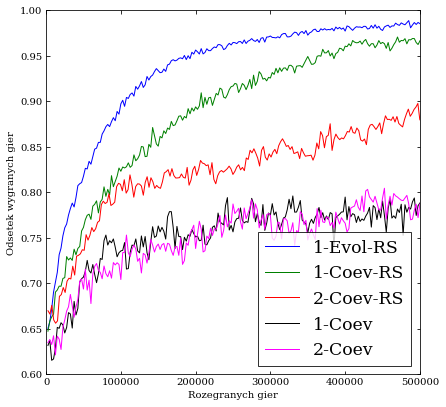

In [35]:
#!/usr/bin/env python3

import csv
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_FOLDER = './dane'
ALGORITHMS = {
    '1-Evol-RS': {
        'filename': 'rsel.csv',
        'color': 'b'
    },
    '1-Coev-RS': {
        'filename': 'cel-rs.csv',
        'color': 'g'
    },
    '2-Coev-RS': {
        'filename': '2cel-rs.csv',
        'color': 'r'
    },
    '1-Coev': {
        'filename': 'cel.csv',
        'color': 'k'
    },
    '2-Coev': {
        'filename': '2cel.csv',
        'color': '#ff00ff'
    }
}

def main():
    plt.figure(figsize=(6.7, 6.7))
    plt.tick_params(left=True, right=True, top=True, bottom=True, direction='in')
    plt.xlim((0, 5 * 10**5))
    plt.ylim((0.6, 1))
    
    for algorithm_name, info in ALGORITHMS.items():
        dataset_filename = info['filename']
        color = info['color']
        
        with open(f'{DATA_FOLDER}/{dataset_filename}') as f:
            columns, *data = list(csv.reader(f))
            columns = dict(map(reversed, enumerate(columns)))
            data = list(map(lambda x: list(map(float, x)), data))
            
            x = list(map(lambda x: x[columns['effort']], data))
            y = list(map(lambda x: statistics.mean(x[2:]), data))

            plt.plot(x, y, label=algorithm_name, color=color, linewidth=1)


    plt.xlabel('Rozegranych gier')
    plt.ylabel('Odsetek wygranych gier')
    plt.legend(loc='lower right', fontsize='xx-large', edgecolor='black', fancybox=False)
    plt.show()


if __name__ == '__main__':
    main()


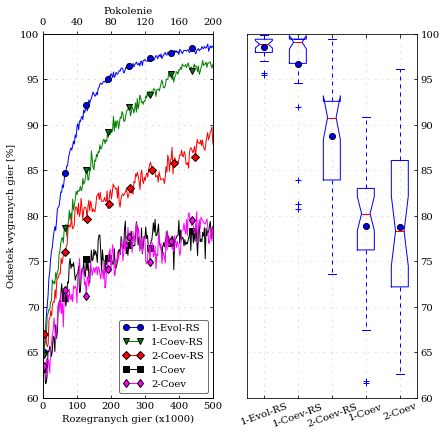

In [177]:
#!/usr/bin/env python3

import csv
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_FOLDER = './dane'
ALGORITHMS = {
    '1-Evol-RS': {
        'filename': 'rsel.csv',
        'color': 'b',
        'marker': 'o'
    },
    '1-Coev-RS': {
        'filename': 'cel-rs.csv',
        'color': 'g',
        'marker': 'v'
    },
    '2-Coev-RS': {
        'filename': '2cel-rs.csv',
        'color': 'r',
        'marker': 'D'
    },
    '1-Coev': {
        'filename': 'cel.csv',
        'color': 'k',
        'marker': 's'
    },
    '2-Coev': {
        'filename': '2cel.csv',
        'color': '#ff00ff',
        'marker': 'd'
    }
}

def main():
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

    plt.figure(figsize=(6.7, 6.7))
    plt.subplot(1, 2, 1)
    
    plt.tick_params(left=True, right=True, top=True, bottom=True, direction='in')
    plt.xlim((0, 500))
    plt.ylim((60, 100))
    
    for algorithm_name, info in ALGORITHMS.items():
        dataset_filename = info['filename']
        color = info['color']
        marker = info['marker']
        
        with open(f'{DATA_FOLDER}/{dataset_filename}') as f:
            columns, *data = list(csv.reader(f))
            columns = dict(map(reversed, enumerate(columns)))
            data = list(map(lambda x: list(map(float, x)), data))
            
            x = list(map(lambda x: x[columns['effort']] / 1000, data))
            y = list(map(lambda x: 100 * statistics.mean(x[2:]), data))

            plt.plot(x, y,
                color=color,
                label=algorithm_name,
                linewidth=1,
                marker=marker,
                markevery=25,
                markeredgecolor='black'
            )


    plt.xlabel('Rozegranych gier (x1000)')
    plt.ylabel('Odsetek wygranych gier [%]')
    plt.legend(loc='lower right', edgecolor='0.3', numpoints=2)
    plt.grid(True, linestyle=':', dashes=(1, 7))
    
    
    secondary_axis = plt.gca().twiny()
    secondary_axis.set_xticks(list(range(0, 201, 40)))
    secondary_axis.set_xlabel('Pokolenie')
    
    plt.subplot(1, 2, 2)
    
    
    plt.grid(True, linestyle=':', dashes=(1, 7))
    plt.gca().yaxis.set_label_position("right")
    plt.gca().yaxis.tick_right()
    plt.tick_params(left=False, right=True, top=True, bottom=True, direction='in')
    
    
    boxplot_data = {}
    for algorithm_name, info in ALGORITHMS.items():
        dataset_filename = info['filename']
        with open(f'{DATA_FOLDER}/{dataset_filename}') as f:
            *_, data = csv.reader(f)
            data = list(map(lambda x: 100 * float(x), data[2:])) # Only run results
            boxplot_data[algorithm_name] = data
    
    plt.boxplot(boxplot_data.values(), 1,
        showmeans=True,
        whiskerprops={'linestyle': '--', 'color': 'b', 'dashes': (4, 4)},
        medianprops={'color': 'r'},
        boxprops={'color': 'b'},
        capprops={'color': 'b'},
        flierprops={'marker': '+', 'markeredgecolor': 'b'},
        meanprops={'marker': 'o', 'markerfacecolor': 'b', 'markeredgecolor': '0', 'markeredgewidth': 1}
    )
    
    plt.gca().set_xticklabels(boxplot_data.keys(), rotation=20)
    plt.ylim((60, 100))
    plt.show()
    


if __name__ == '__main__':
    main()
